## Results visualisaiton

In this notebook, we create visualisations to report the results of the virus simulations.

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import pickle
import sys
import os

In [132]:
covid_path = 'Simulations/covid_2023-04-23-18-45-35'
marburg_path = 'Simulations/marburg_static_death_rate'

In [133]:
# needed to be able to pickle
class agent:
    pass

In [134]:
# read covid data
covid_dict = {}
for vr in os.listdir(covid_path):
    data_path = os.path.join(covid_path, vr, 'statistics.pkl')

    with open(data_path, 'rb') as data:
        stats = pickle.load(data)
    
    covid_dict[vr] = stats

print("Imported covid results into covid_dict.")
# read marburg data
marburg_dict = {}
for vr in os.listdir(marburg_path):
    data_path = os.path.join(marburg_path, vr, 'statistics.pkl')

    with open(data_path, 'rb') as data:
        stats = pickle.load(data)
    
    marburg_dict[vr] = stats

print("Imported marburg results into marburg_dict.")


Imported covid results into covid_dict.
Imported marburg results into marburg_dict.


## MVD results

The following visuals are listed:

- Total deaths for each vaccinaiton rate
- Total infected for each vaccinaiton rate
- basic reproduction number for each vaccination rate


Notes:
In the total deaths by vaccination rate series, we see that for both viruses, when we exceed 60% vaccination rate the number of deaths and duration of simulaiton are significantly lower. This means that with such vaccination rates, both viruses are essentially eradicated before outbreak.

In [135]:
covid_dict['vac_rate_0'].keys()

dict_keys(['infected_ts', 'total_infected_ts', 'casualty_ts', 'total_casualty_ts', 'basic_reproduction_number_ts', 'agents', 'agent_immunity'])

MVD deaths over time for varying vaccination rate


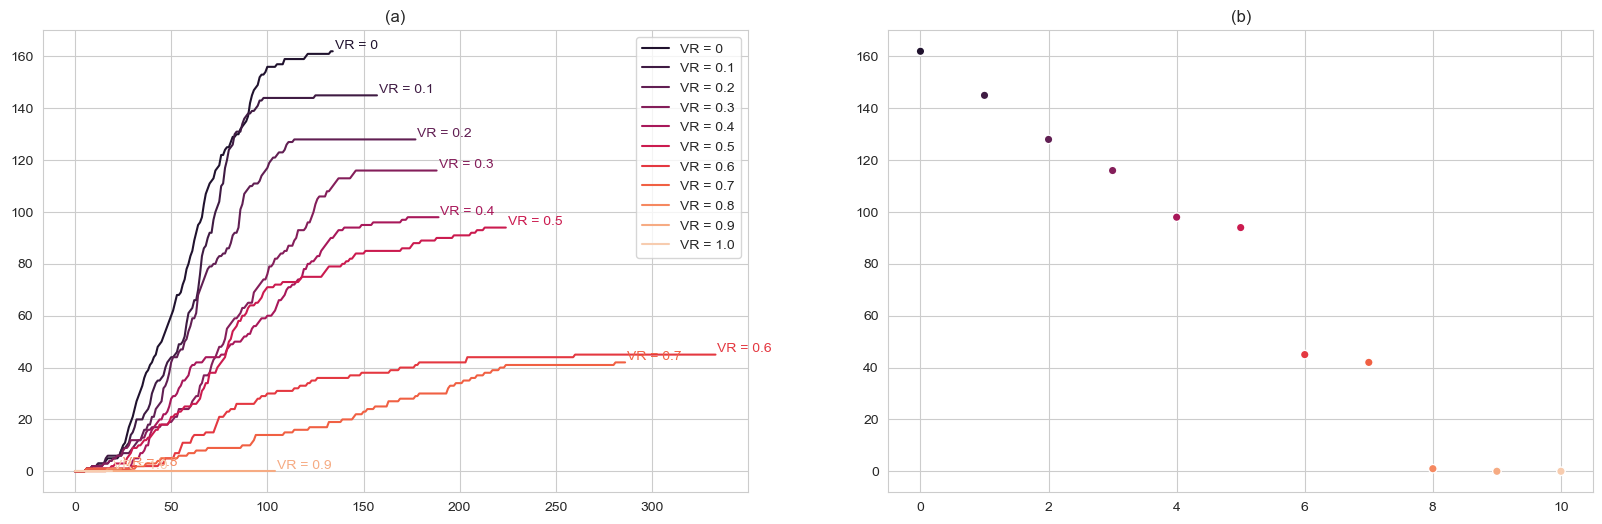

In [165]:
# plot total deaths ts for each vac rate (time series)
sns.set_style('whitegrid')
n_colours = 11
sns.set_palette('rocket', n_colours)
deaths_by_vr = []

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for vac_rate, d in sorted(marburg_dict.items(), key = lambda x: x[0]):
    x = range(len(d['total_casualty_ts']))
    y = d['total_casualty_ts']
    label = 'VR = {}'.format(vac_rate.split("_")[-1])

    sns.lineplot(x=x, y=y, label=label, ax=axs[0])

    last_x, last_y = x[-1], y[-1]
    axs[0].annotate(label, xy=(last_x, last_y), xytext=(last_x + 1, last_y + 1), color=axs[0].get_lines()[-1].get_color())


# plot total deaths ts for each vac rate (just the number of deaths at the end)

# store the total casualties by vaccination rate
for vac_rate, d in sorted(marburg_dict.items(), key = lambda x: x[0]):
     deaths_by_vr.append(d['total_casualty_ts'][-1])

# plot
colors = [c.get_color() for c in axs[0].get_lines()]
sns.scatterplot(deaths_by_vr, marker='.', s = 150, ax=axs[1], color=colors)

axs[0].set(title='(a)')
axs[1].set(title='(b)')

print("MVD deaths over time for varying vaccination rate")
plt.show()


MVD infections over time for varying vaccination rate


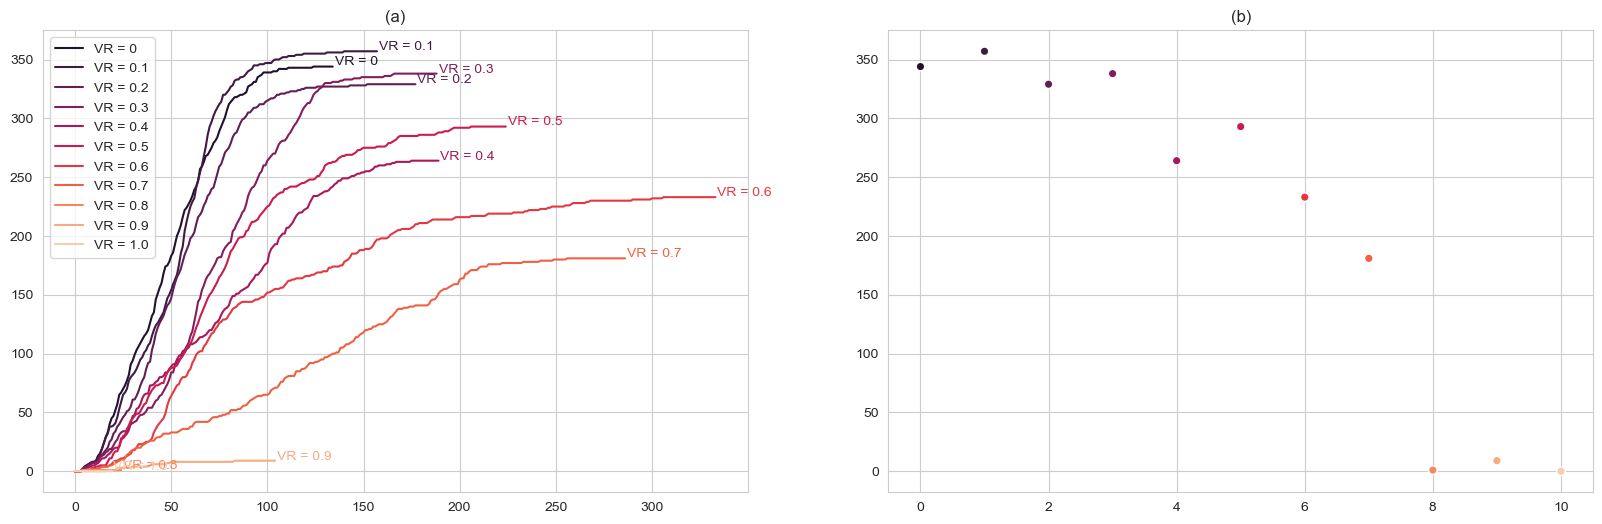

In [164]:
# plot total infections ts for each vac rate (time series)
sns.set_style('whitegrid')
n_colours = 11
sns.set_palette('rocket', n_colours)
deaths_by_vr = []

fig, axs = plt.subplots(1, 2, figsize=((20, 6)))

for vac_rate, d in sorted(marburg_dict.items(), key = lambda x: x[0]):
    x = range(len(d['total_infected_ts']))
    y = d['total_infected_ts']
    label = 'VR = {}'.format(vac_rate.split("_")[-1])

    sns.lineplot(x=x, y=y, label=label, ax=axs[0])

    last_x, last_y = x[-1], y[-1]
    axs[0].annotate(label, xy=(last_x, last_y), xytext=(last_x + 1, last_y + 1), color=axs[0].get_lines()[-1].get_color())


# plot total deaths ts for each vac rate (just the number of deaths at the end)

# store the total casualties by vaccination rate
for vac_rate, d in sorted(marburg_dict.items(), key = lambda x: x[0]):
     deaths_by_vr.append(d['total_infected_ts'][-1])

# plot
colors = [c.get_color() for c in axs[0].get_lines()]
sns.scatterplot(deaths_by_vr, marker='.', s = 150, ax=axs[1], color=colors)

axs[0].set(title='(a)')
axs[1].set(title='(b)')

print("MVD infections over time for varying vaccination rate")
plt.show()


Basic reproduction rate over time for varying vaccination rate


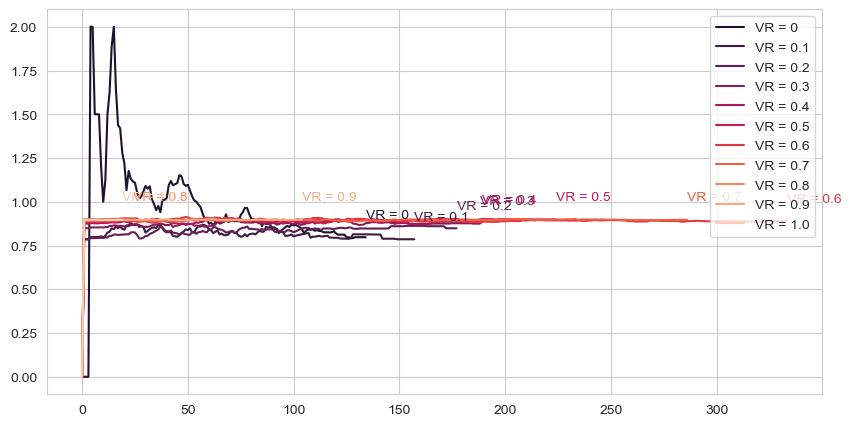

In [163]:
# plot R0 ts for each vac rate (time series)
sns.set_style('whitegrid')
n_colours = 11
sns.set_palette('rocket', n_colours)
deaths_by_vr = []

fig, axs = plt.subplots(figsize=(10, 5))

for vac_rate, d in sorted(marburg_dict.items(), key = lambda x: x[0]):
    x = range(len(d['basic_reproduction_number_ts']))
    y = d['basic_reproduction_number_ts']
    label = 'VR = {}'.format(vac_rate.split("_")[-1])

    sns.lineplot(x=x, y=y, label=label, ax=axs)

    last_x, last_y = x[-1], y[-1]
    axs.annotate(label, xy=(last_x, last_y), xytext=(last_x + 0.1, last_y + 0.11), color=axs.get_lines()[-1].get_color())


print("Basic reproduction rate over time for varying vaccination rate")
plt.show()


## Covid results

Covid deaths over time for varying vaccination rate


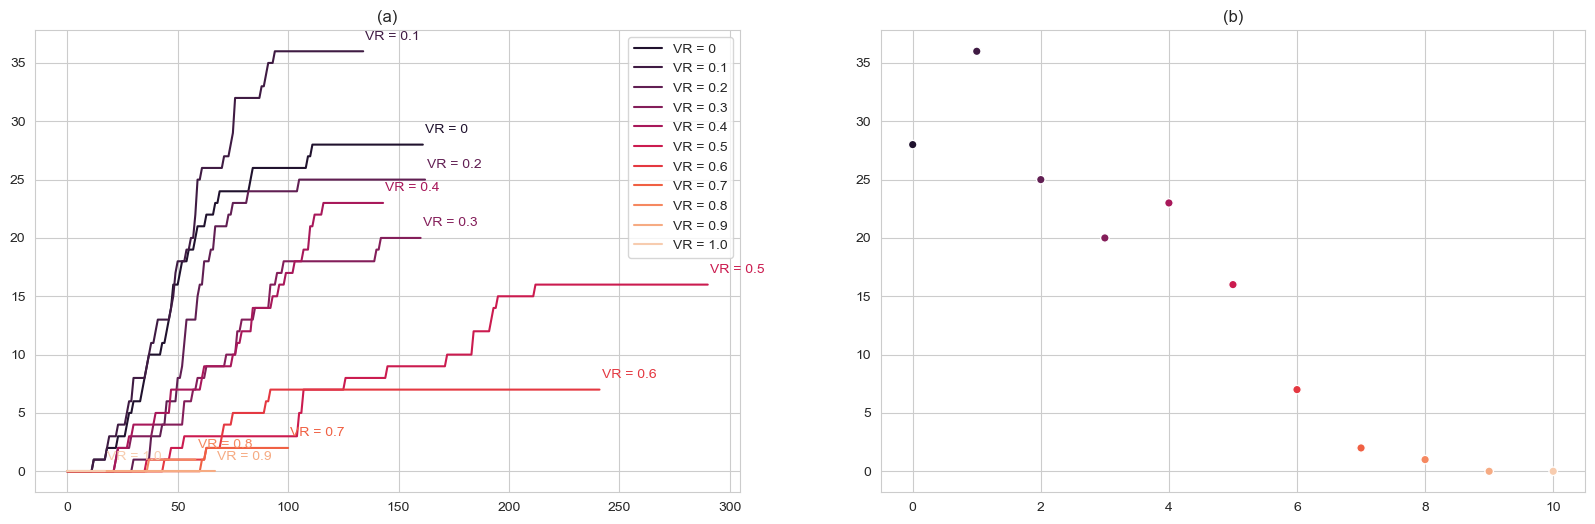

In [155]:
# plot total deaths ts for each vac rate (time series)
sns.set_style('whitegrid')
n_colours = 11
sns.set_palette('rocket', n_colours)
deaths_by_vr = []

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for vac_rate, d in sorted(covid_dict.items(), key = lambda x: x[0]):
    x = range(len(d['total_casualty_ts']))
    y = d['total_casualty_ts']
    label = 'VR = {}'.format(vac_rate.split("_")[-1])

    sns.lineplot(x=x, y=y, label=label, ax=axs[0])

    last_x, last_y = x[-1], y[-1]
    axs[0].annotate(label, xy=(last_x, last_y), xytext=(last_x + 1, last_y + 1), color=axs[0].get_lines()[-1].get_color())


# plot total deaths ts for each vac rate (just the number of deaths at the end)

# store the total casualties by vaccination rate
for vac_rate, d in sorted(covid_dict.items(), key = lambda x: x[0]):
     deaths_by_vr.append(d['total_casualty_ts'][-1])

# plot
colors = [c.get_color() for c in axs[0].get_lines()]
sns.scatterplot(deaths_by_vr, marker='.', s = 150, ax=axs[1], color=colors)

axs[0].set(title='(a)')
axs[1].set(title='(b)')

print("Covid deaths over time for varying vaccination rate")
plt.show()


Covid infections over time for varying vaccination rate


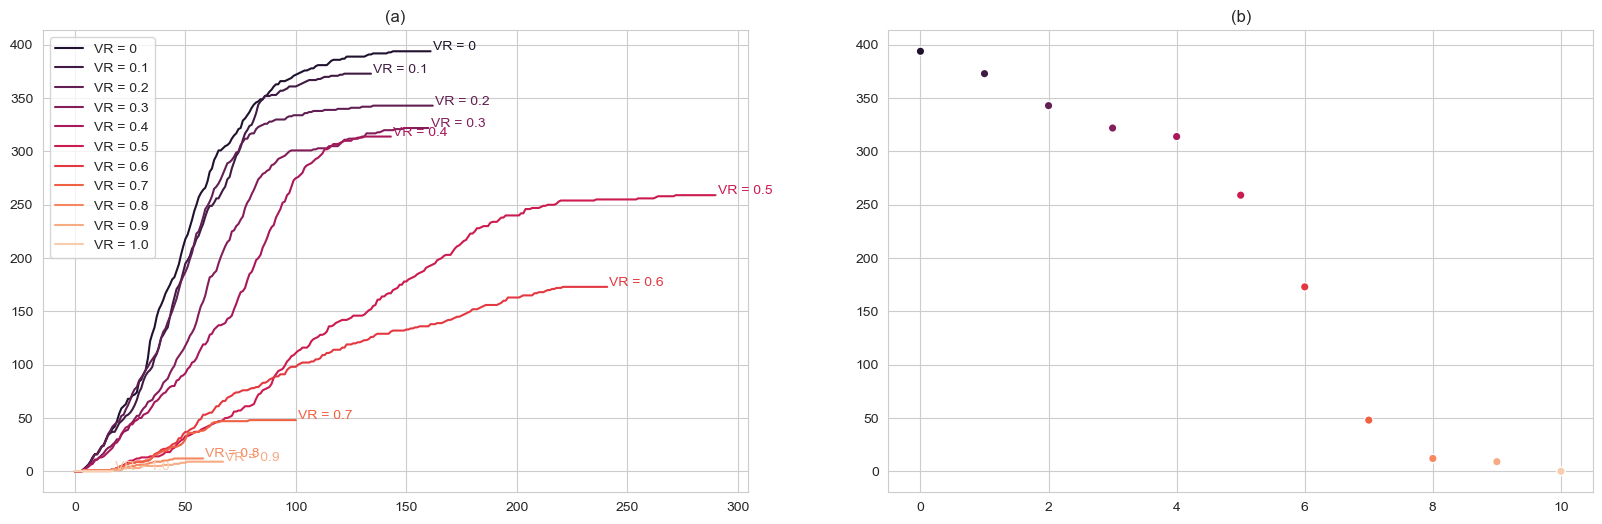

In [157]:
# plot total infections ts for each vac rate (time series)
sns.set_style('whitegrid')
n_colours = 11
sns.set_palette('rocket', n_colours)
deaths_by_vr = []

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for vac_rate, d in sorted(covid_dict.items(), key = lambda x: x[0]):
    x = range(len(d['total_infected_ts']))
    y = d['total_infected_ts']
    label = 'VR = {}'.format(vac_rate.split("_")[-1])

    sns.lineplot(x=x, y=y, label=label, ax=axs[0])

    last_x, last_y = x[-1], y[-1]
    axs[0].annotate(label, xy=(last_x, last_y), xytext=(last_x + 1, last_y + 1), color=axs[0].get_lines()[-1].get_color())


# plot total deaths ts for each vac rate (just the number of deaths at the end)

# store the total casualties by vaccination rate
for vac_rate, d in sorted(covid_dict.items(), key = lambda x: x[0]):
     deaths_by_vr.append(d['total_infected_ts'][-1])

# plot
colors = [c.get_color() for c in axs[0].get_lines()]
sns.scatterplot(deaths_by_vr, marker='.', s = 150, ax=axs[1], color=colors)

axs[0].set(title='(a)')
axs[1].set(title='(b)')

print("Covid infections over time for varying vaccination rate")
plt.show()


Basic reproduction rate over time for varying vaccination rate - COVID


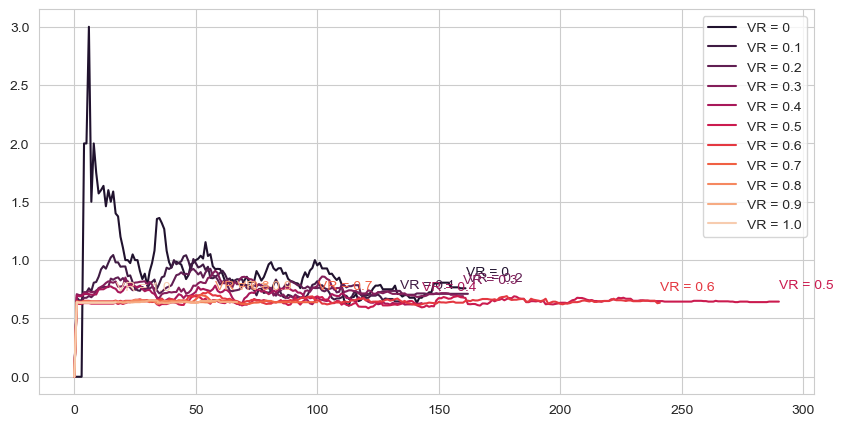

In [160]:
# plot R0 ts for each vac rate (time series)
sns.set_style('whitegrid')
n_colours = 11
sns.set_palette('rocket', n_colours)
deaths_by_vr = []

fig, axs = plt.subplots(figsize=(10, 5))

for vac_rate, d in sorted(covid_dict.items(), key = lambda x: x[0]):
    x = range(len(d['basic_reproduction_number_ts']))
    y = d['basic_reproduction_number_ts']
    label = 'VR = {}'.format(vac_rate.split("_")[-1])

    sns.lineplot(x=x, y=y, label=label, ax=axs)

    last_x, last_y = x[-1], y[-1]
    axs.annotate(label, xy=(last_x, last_y), xytext=(last_x + 0.1, last_y + 0.11), color=axs.get_lines()[-1].get_color())


print("Basic reproduction rate over time for varying vaccination rate - COVID")
plt.show()
